# Introdução

Estou adotando como metodologia para o estudo de caso desta base de dados a metodologia do Crisp-DM. \ 

Estamos na etapa da anális dos dados \
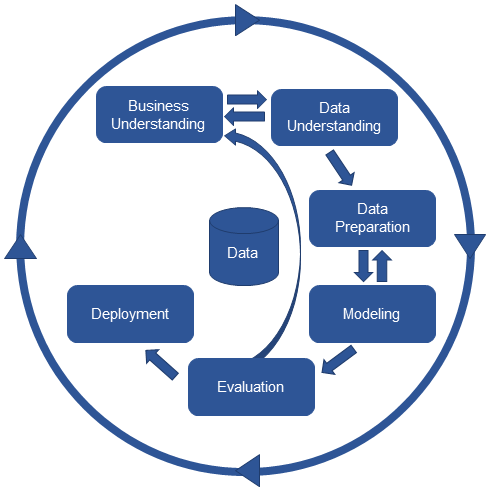

# Data Understanding

In [2]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# importando dados
df_train = pd.read_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/dados_projeto/train.csv")
df_transactions = pd.read_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/dados_projeto/transactions.csv")
df_stores = pd.read_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/dados_projeto/stores.csv")
df_oil = pd.read_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/dados_projeto/oil.csv")
df_holliday = pd.read_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/dados_projeto/holidays_events.csv")

In [4]:
# verificando a dimensao dos dados
def dados(*dfs):
    for i, df in enumerate(dfs, start = 1):
        print(f" DataFrame {i} possui {df.shape[0]} linhas e {df.shape[1]} colunas.")


In [5]:
dados(df_train, df_transactions, df_stores, df_oil, df_holliday)

 DataFrame 1 possui 205095 linhas e 6 colunas.
 DataFrame 2 possui 6567 linhas e 3 colunas.
 DataFrame 3 possui 5 linhas e 5 colunas.
 DataFrame 4 possui 956 linhas e 2 colunas.
 DataFrame 5 possui 19 linhas e 6 colunas.


In [6]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,2.050950e+05,205095.000000,205095.000000,205095.000000
mean,1.757794e+06,3.000000,476.609338,3.344635
std,6.394245e+05,1.414217,1316.234710,14.249508
min,6.504300e+05,1.000000,0.000000,0.000000
25%,1.203964e+06,2.000000,3.000000,0.000000
50%,1.757794e+06,3.000000,30.000000,0.000000
75%,2.311624e+06,4.000000,321.000000,1.000000
max,2.865158e+06,5.000000,124717.000000,230.000000


Notamos que temos: \
1. a menor quantidade de produtos vendidos em um dia é 0$; \
2. a maior quantidade de produtos vendidos em um dia é 124717.00 \ 

Assim nos dando uma amplitude de preço bastante elevada.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205095 entries, 0 to 205094
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           205095 non-null  int64  
 1   date         205095 non-null  object 
 2   store_nbr    205095 non-null  int64  
 3   family       205095 non-null  object 
 4   sales        205095 non-null  float64
 5   onpromotion  205095 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 9.4+ MB


Notamos que todos as colunas estão preenchidas-não há dados faltantes.

In [8]:
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [9]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,650430,2014-01-02,1,AUTOMOTIVE,3.0,0
1,650431,2014-01-02,1,BABY CARE,0.0,0
2,650432,2014-01-02,1,BEAUTY,6.0,0
3,650433,2014-01-02,1,BEVERAGES,2524.0,0
4,650434,2014-01-02,1,BOOKS,0.0,0


In [10]:
df_oil.head()

,date,price
0,2014-01-02,95.14
1,2014-01-03,93.66
2,2014-01-06,93.12
3,2014-01-07,93.31
4,2014-01-08,91.90


In [11]:
df_holliday.head()

,date,type,locale,locale_name,description,transferred
0,2012-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False
1,2012-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
2,2012-12-06,Holiday,Local,Quito,Fundacion de Quito,False
3,2013-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False
4,2013-12-05,Additional,Local,Quito,Fundacion de Quito-1,False


In [12]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [13]:
df_transactions.head()

,date,store_nbr,transactions
0,2014-01-02,1,1875
1,2014-01-02,2,2122
2,2014-01-02,3,3350
3,2014-01-02,4,1661
4,2014-01-02,5,1807


In [14]:
df_train["store_nbr"].unique()

array([1, 2, 3, 4, 5])

Em nossa Base de dados conseguimos verificar que temos 5 lojas.

Notamos que temos 5 lojas.

In [15]:
df_train["family"].nunique()

33

Vemos que nessas lojas temos 33 famílias de produtos diferentes.

In [16]:
df_train["onpromotion"].nunique()

229

Assim como verificamos que 229 vezes esses produtos entraram em promoção.

# Análise gráfica

## Análise de vendas nas lojas

In [17]:
# verificando novamente a base
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,650430,2014-01-02,1,AUTOMOTIVE,3.0,0
1,650431,2014-01-02,1,BABY CARE,0.0,0
2,650432,2014-01-02,1,BEAUTY,6.0,0
3,650433,2014-01-02,1,BEVERAGES,2524.0,0
4,650434,2014-01-02,1,BOOKS,0.0,0


In [18]:
# verificando o tipo de dados
df_train.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [19]:
# transformando a coluna date para data
df_train["date"] = pd.to_datetime(df_train["date"])
df_train["date_month"] = df_train["date"].dt.strftime('%Y%m')
df_train["date_year"] = df_train["date"].dt.strftime('%Y')
df_train.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
date_month             object
date_year              object
dtype: object

In [21]:
df_train

,id,date,store_nbr,family,sales,onpromotion,date_month,date_year
0,650430,2014-01-02,1,AUTOMOTIVE,3.000,0,201401,2014
1,650431,2014-01-02,1,BABY CARE,0.000,0,201401,2014
2,650432,2014-01-02,1,BEAUTY,6.000,0,201401,2014
3,650433,2014-01-02,1,BEVERAGES,2524.000,0,201401,2014
4,650434,2014-01-02,1,BOOKS,0.000,0,201401,2014
...,...,...,...,...,...,...,...,...
205090,2865154,2017-05-31,5,POULTRY,228.597,0,201705,2017
205091,2865155,2017-05-31,5,PREPARED FOODS,62.246,2,201705,2017
205092,2865156,2017-05-31,5,PRODUCE,1955.523,161,201705,2017
205093,2865157,2017-05-31,5,SCHOOL AND OFFICE SUPPLIES,1.000,0,201705,2017


In [32]:
analise_mes = df_train.groupby("date_month")["sales"].sum().reset_index()
analise_ano = df_train.groupby("date_year")["sales"].sum().reset_index()

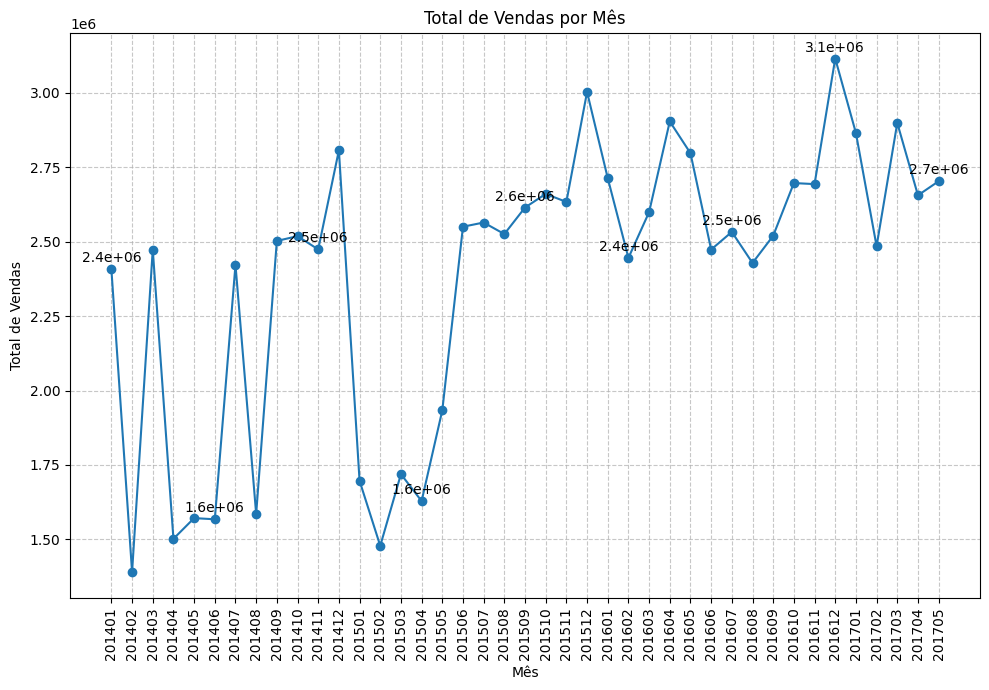

In [61]:
# ajustando o tamanho imagem
plt.figure(figsize=(10,7))
# Criando o gráfico de linha
plt.plot(analise_mes['date_month'], analise_mes['sales'], marker='o')


for i  in range(0, len(analise_mes["sales"]), 5):
    plt.annotate(f"{analise_mes['sales'].iloc[i]:.2}",
                 (analise_mes["date_month"].iloc[i], analise_mes['sales'].iloc[i]),
                 textcoords = "offset points",
                 xytext = (0,5),
                 ha = "center"
                 )
# Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title("Total de Vendas por Mês")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Conseguimos verificar que há uma grande oscilação no numero de vendas entre Janeiro de 2014 a Junho de 2015.

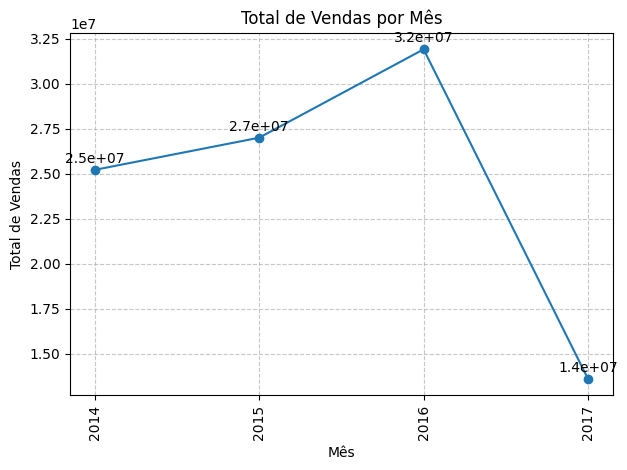

In [64]:
# Criando o gráfico de linha
plt.plot(analise_ano['date_year'], analise_ano['sales'], marker='o')

for i in range(0,len(analise_ano["date_year"])):
    plt.annotate(f"{analise_ano['sales'].iloc[i]:.2}",
                 (analise_ano["date_year"].iloc[i], analise_ano['sales'].iloc[i]),
                 textcoords = "offset points",
                 xytext = (0,5),
                 ha = "center"
                 )
# Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title("Total de Vendas por Mês")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Conseguimos verificar que o maior ano com vendas foi o ano de 2016, seguido pelo ano de 2015, 2014. \
Vale mencionar ano de 2017 não possui informações sobre todo o ano, indo até o mês de junho.

In [66]:
analise_loja1 = df_train.groupby(["date_month", "store_nbr"])["sales"].sum().reset_index()
analise_loja2 = df_train.groupby(["date_year",  "store_nbr"])["sales"].sum().reset_index()

In [67]:
analise_loja1

,date_month,store_nbr,sales
0,201401,1,2.916648e+05
1,201401,2,4.164000e+05
2,201401,3,9.964937e+05
3,201401,4,3.705724e+05
4,201401,5,3.315495e+05
...,...,...,...
200,201705,1,3.281519e+05
201,201705,2,4.809061e+05
202,201705,3,1.170636e+06
203,201705,4,4.117227e+05


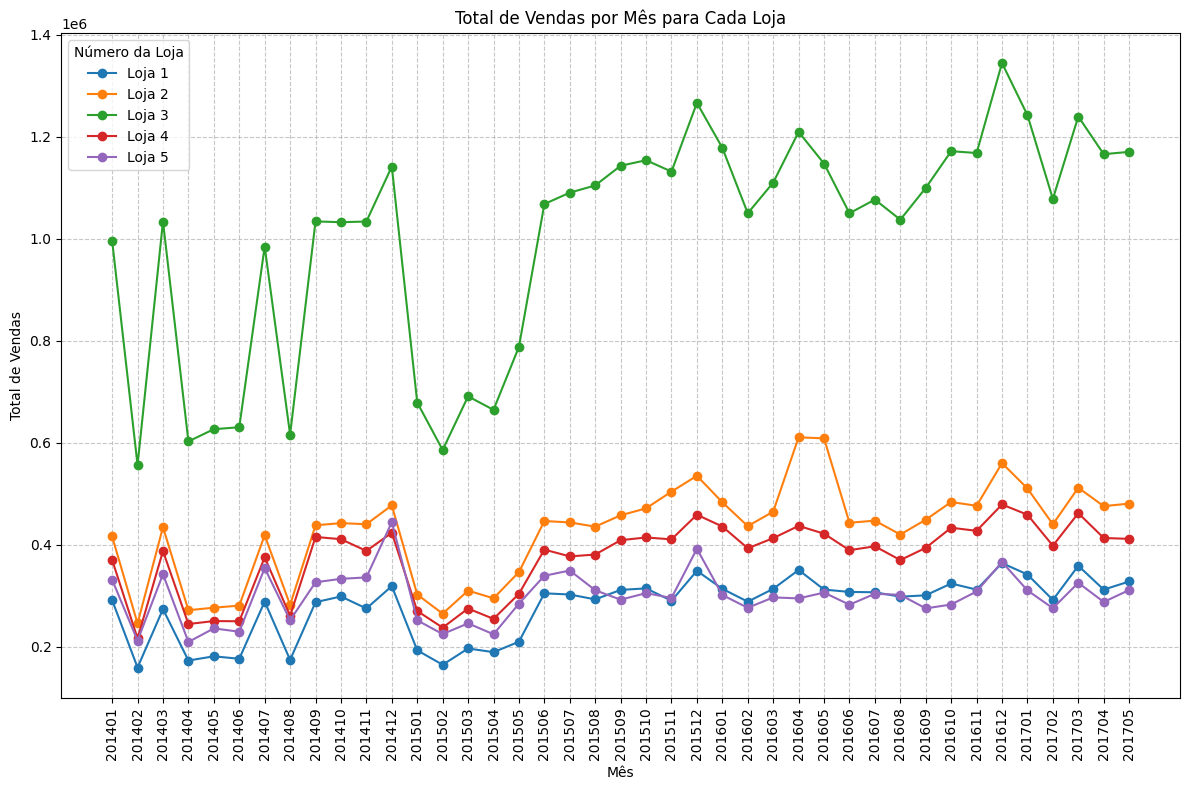

In [69]:
lojas = analise_loja1['store_nbr'].unique()

# ajustando o tamanho imagem

plt.figure(figsize=(12,8))

for loja in lojas:
    loja_data = analise_loja1[analise_loja1["store_nbr"] == loja]
    plt.plot(loja_data["date_month"], loja_data["sales"], marker = "o", label = f"Loja {loja}")

# Adiciona detalhes ao gráfico
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Mês para Cada Loja')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Número da Loja')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

Notamos que todas as lojas possuem um comportamento de venda semelhante. No entanto, a loja destaque \
de nossa base de dados é a loja de número 1.

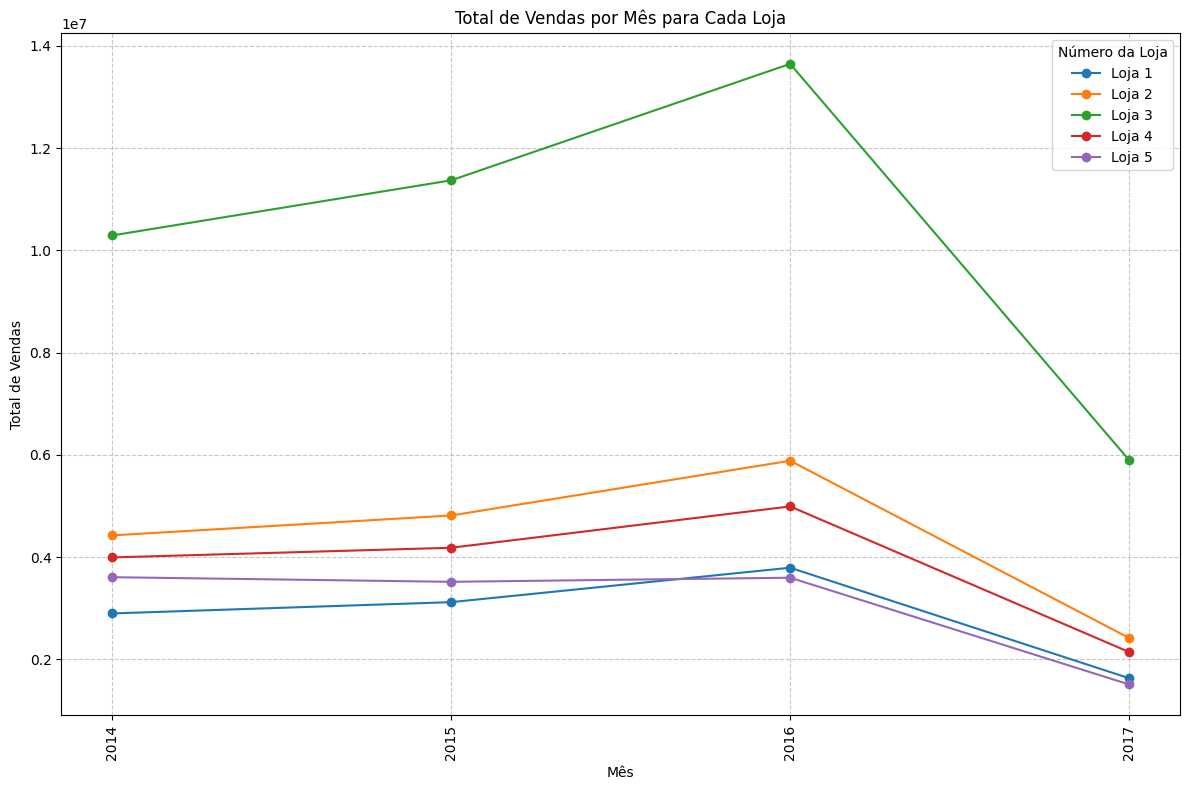

In [71]:
lojas = analise_loja2['store_nbr'].unique()

# ajustando o tamanho imagem

plt.figure(figsize=(12,8))

for loja in lojas:
    loja_data = analise_loja2[analise_loja2["store_nbr"] == loja]
    plt.plot(loja_data["date_year"], loja_data["sales"], marker = "o", label = f"Loja {loja}")

# Adiciona detalhes ao gráfico
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Mês para Cada Loja')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Número da Loja')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

Conseguimos verificar que loja número 1 teve um comportamento de vendas acima de 1 milhão de dólares nos anos de 2014, 2015 e 2016.
Estando acima de todas as outras lojas.

## Análise de Vendas dos produtos

In [72]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,date_month,date_year
0,650430,2014-01-02,1,AUTOMOTIVE,3.0,0,201401,2014
1,650431,2014-01-02,1,BABY CARE,0.0,0,201401,2014
2,650432,2014-01-02,1,BEAUTY,6.0,0,201401,2014
3,650433,2014-01-02,1,BEVERAGES,2524.0,0,201401,2014
4,650434,2014-01-02,1,BOOKS,0.0,0,201401,2014


In [76]:
analise_produto = df_train.groupby("family")["sales"].sum().reset_index().sort_values(by="sales", ascending=False)

In [81]:
analise_produto

,family,sales
12,GROCERY I,2.629947e+07
3,BEVERAGES,2.019529e+07
30,PRODUCE,1.680153e+07
7,CLEANING,7.009609e+06
8,DAIRY,6.594256e+06
5,BREAD/BAKERY,3.744080e+06
28,POULTRY,3.573318e+06
24,MEATS,2.853464e+06
25,PERSONAL CARE,1.842123e+06
9,DELI,1.566418e+06


In [ ]:
for i  in range(0, len(analise_mes["sales"]), 5):
    plt.annotate(f"{analise_mes['sales'].iloc[i]:.2}",
                 (analise_mes["date_month"].iloc[i], analise_mes['sales'].iloc[i]),
                 textcoords = "offset points",
                 xytext = (0,5),
                 ha = "center"
                 )

/tmp/ipykernel_3867/3713317596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analise_produto, x='family', y='sales', palette='viridis')


<Figure size 1000x1000 with 0 Axes>

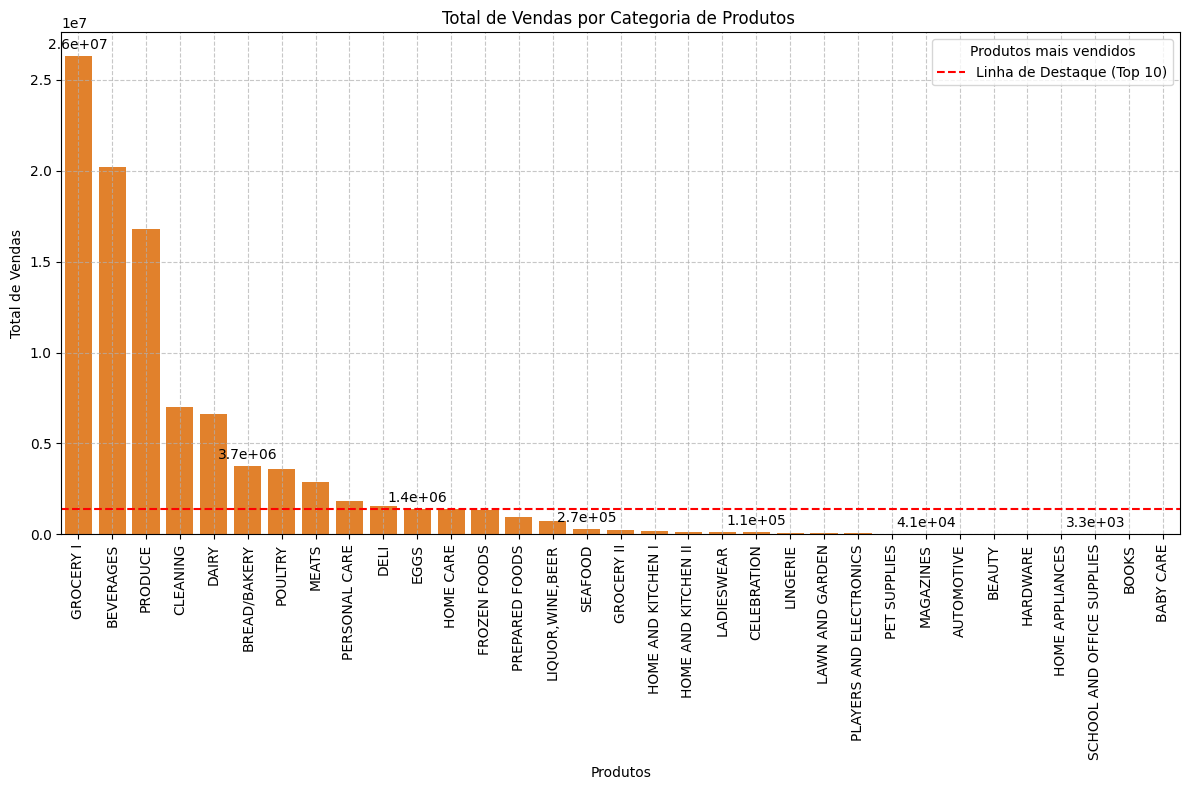

In [89]:
plt.figure(figsize=(10,10))
top_10_threshold = analise_produto.sort_values(by='sales', ascending=False).iloc[10]['sales']

# Ajusta o tamanho da figura (largura, altura)
plt.figure(figsize=(12, 8))

# Plota o gráfico de barras para todos os produtos
sns.barplot(data=analise_produto, x='family', y='sales', palette='viridis')

# Adiciona uma linha horizontal no nível de vendas do 10º produto mais vendido
plt.axhline(y=top_10_threshold, color='r', linestyle='--', label='Linha de Destaque (Top 10)')

for i in range(0, len(analise_produto["family"]),5):
    plt.annotate(f"{analise_produto["sales"].iloc[i]:.2}",
                 (i, analise_produto["sales"].iloc[i]),
                 textcoords = "offset points",
                 xytext = (0,5),
                 ha = "center")

sns.barplot(analise_produto, x = "family", y = "sales")
# Adiciona detalhes ao gráfico
plt.xlabel('Produtos')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Categoria de Produtos ')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Produtos mais vendidos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

Notamos que os produtos mais vendidos são:

1. grocery - mercearia;
2. beverages - bebidas
3. produce - produtos
4. cleaning - limpeza
5. dairy -laticínios
6. bread/bakery - pão/padaria
7. poultry - aves
8. meats - carnes
9. personal care - cuidados pessoais
10. Deli - guoseimas
11. Eggs - ovos
12. Home Care - produtos de casa
13. Frozen foods - comidas congeladas